In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2024-11-03 12:02:42.137818: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# Step 1: Load the Dataset# Replace with your dataset path
df = pd.read_csv('Churn_Modelling.csv')


In [3]:

# Step 2: Data Preprocessing
# Drop non-useful columns
df = df.drop(columns=['CustomerId', 'Surname', 'RowNumber'])


In [4]:

# Convert categorical columns to numeric
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [5]:

# Separate features (X) and target (y)
X = df.drop(columns=['Exited'])  # Features
y = df['Exited']  # Target variable


In [6]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:

# Step 3: Build the Model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),  # Dropout layer for regularization
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6677 - loss: 0.6107 - val_accuracy: 0.8106 - val_loss: 0.4316
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8089 - loss: 0.4485 - val_accuracy: 0.8269 - val_loss: 0.4123
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8061 - loss: 0.4452 - val_accuracy: 0.8350 - val_loss: 0.4003
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8222 - loss: 0.4299 - val_accuracy: 0.8394 - val_loss: 0.3886
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8417 - loss: 0.4035 - val_accuracy: 0.8494 - val_loss: 0.3740
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8318 - loss: 0.4116 - val_accuracy: 0.8500 - val_loss: 0.3689
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8306 - loss: 0.3980 - val_accuracy: 0.8494 - val_loss: 0.3635
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8371 - loss: 0.3952 - val_accuracy: 0

In [11]:

# Step 5: Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [12]:

# Calculate accuracy and print confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [13]:

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8615
Confusion Matrix:
 [[1568   39]
 [ 238  155]]


In [14]:

# Optional: Plot model performance
import matplotlib.pyplot as plt


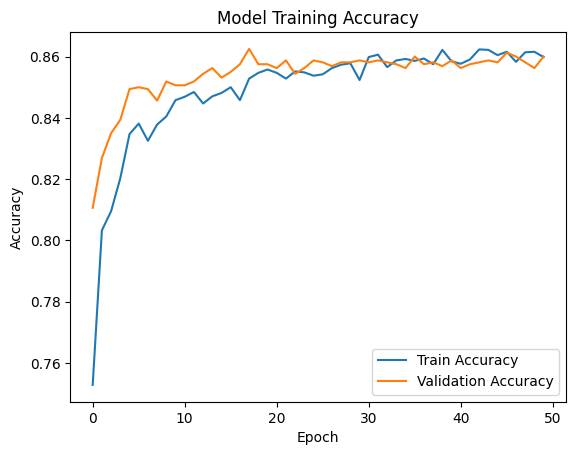

In [15]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Training Accuracy")
plt.show()
